In [1]:
##USEFUL LINKS:
#https://pypi.org/project/rake-nltk/ -> lib for RAKE short for Rapid Automatic Keyword Extraction algorithm

In [2]:
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install rake-nltk
!{sys.executable} -m pip install sqlalchemy
!{sys.executable} -m pip install panda
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sg0301077\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.schema import Table, DropTable
from rake_nltk import Rake, Metric
import pandas as pd
import os.path

In [3]:
%matplotlib inline

In [4]:
Session = sessionmaker()
engine = create_engine('sqlite:///ztis.db')

In [5]:
feeds = pd.read_sql_query('SELECT * FROM ztis', engine)
print(feeds.shape)

(11881, 6)


In [6]:
feeds[:11881]

,id,source,title,summary,publication_date,author
0,1,BBC\n,Labour pledges £10 minimum wage for under-18s,Jeremy Corbyn unveils plans for under-18s to b...,"Sat, 11 May 2019 14:27:26 GMT",default
1,2,BBC\n,Brexit: Gavin Williamson attacks Theresa May's...,The recently sacked defence secretary says neg...,"Sat, 11 May 2019 23:04:45 GMT",default
2,3,BBC\n,Theresa May could set exit date this week - Si...,Senior Tory Sir Graham Brady says he expects t...,"Sat, 11 May 2019 15:06:51 GMT",default
3,4,BBC\n,Sajid Javid: I get abuse because of my colour,Home secretary tells BBC he is criticised for ...,"Fri, 10 May 2019 15:45:21 GMT",default
4,5,BBC\n,Stormont stalemate: Coveney hopes for progress...,Simon Coveney says two governments will do som...,"Fri, 10 May 2019 10:48:30 GMT",default
5,6,BBC\n,Guy Verhofstadt: I don't know if Brexit will h...,The European Parliament's liberal leader says ...,"Fri, 10 May 2019 17:08:04 GMT",default
6,7,BBC\n,Climate change 'may curb growth in UK flying',The UK may need to review expansion of aviatio...,"Fri, 10 May 2019 23:40:14 GMT",default
7,8,BBC\n,Sadiq Khan: Theresa May should 'call out' Dona...,"""I'm not suggesting she does a Hugh Grant-type...","Fri, 10 May 2019 14:18:22 GMT",default
8,9,BBC\n,Have I Got News For You Heidi Allen episode pu...,"The BBC says it is ""inappropriate"" to feature ...","Sat, 11 May 2019 18:02:34 GMT",default
9,10,BBC\n,UK economy rebounds in first quarter,Brexit stockpiling by firms helps to lift UK g...,"Fri, 10 May 2019 10:29:33 GMT",default


# Basic RAKE usage example


In [7]:
r = Rake() # Uses stopwords for english from NLTK, and all puntuation characters.
text = feeds["summary"].iloc[0]
text

'Jeremy Corbyn unveils plans for under-18s to be paid £10 an hour, rather than the current £4.35.'

In [8]:
r.extract_keywords_from_text(text)

r.get_ranked_phrases()

['jeremy corbyn unveils plans',
 'paid £ 10',
 'current £ 4',
 'rather',
 'hour',
 '35',
 '18s']

# Advanced RAKE usage example

In [9]:
r2 = Rake(language='english')

In [10]:
r2 = Rake()
#r2 = Rake(ranking_metric=Metric.WORD_DEGREE)
#r2 = Rake(ranking_metric=Metric.WORD_FREQUENCY)
r2.extract_keywords_from_text(text)
r2.get_ranked_phrases_with_scores()

[(16.0, 'jeremy corbyn unveils plans'),
 (9.0, 'paid £ 10'),
 (9.0, 'current £ 4'),
 (1.0, 'rather'),
 (1.0, 'hour'),
 (1.0, '35'),
 (1.0, '18s')]

In [11]:
r = Rake(stopwords=['rather','hour'],punctuations=['-','.'],language='english')
r.extract_keywords_from_text(text)
r.get_ranked_phrases_with_scores()

[(48.0, '18s to be paid £ 10 an'),
 (36.0, 'jeremy corbyn unveils plans for under'),
 (26.0, 'than the current £ 4'),
 (1.0, '35'),
 (1.0, ',')]

In [12]:
r.get_word_frequency_distribution()

Counter({'35': 1,
         ',': 1,
         'jeremy': 1,
         'corbyn': 1,
         'unveils': 1,
         'plans': 1,
         'for': 1,
         'under': 1,
         'than': 1,
         'the': 1,
         'current': 1,
         '£': 2,
         '4': 1,
         '18s': 1,
         'to': 1,
         'be': 1,
         'paid': 1,
         '10': 1,
         'an': 1})

In [13]:
r.get_word_degrees()

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'35': 1,
             ',': 1,
             'jeremy': 6,
             'corbyn': 6,
             'unveils': 6,
             'plans': 6,
             'for': 6,
             'under': 6,
             'than': 5,
             'the': 5,
             'current': 5,
             '£': 12,
             '4': 5,
             '18s': 7,
             'to': 7,
             'be': 7,
             'paid': 7,
             '10': 7,
             'an': 7})

# Automated Keyword Extraction from Articles using NLP
https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34?fbclid=IwAR2mt7jpme9edbNB2ZIyUY14NYTc73qHZhrEVdbV4emZT--ijIeg1VCt9EU


In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sg0301077\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sg0301077\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
tekstFeeds = feeds[["id", "title", "summary"]]
tekstFeeds["text"] = tekstFeeds['title'] + " " + tekstFeeds['summary']


C:\programs\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
pd.options.display.max_colwidth = 500
tekstFeeds[:1]

,id,title,summary,text
0,1,Labour pledges £10 minimum wage for under-18s,"Jeremy Corbyn unveils plans for under-18s to be paid £10 an hour, rather than the current £4.35.","Labour pledges £10 minimum wage for under-18s Jeremy Corbyn unveils plans for under-18s to be paid £10 an hour, rather than the current £4.35."


In [17]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
new_words = ["http", "feed", "news", "href", "com", "img", "scr", "defoult", "reuters", "ff", "div", "class", 
             "feedflare", "auoc", "feedburner", "src", "worldnews", "yil", "height", "width", "default'",
            "new", "www", "alt'", "aligne left", "za", "zbnmyn"]
stop_words = stop_words.union(new_words)

In [18]:
tekstFeeds.shape

(11881, 4)

In [19]:
corpus = []
for i in range(0, tekstFeeds.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', tekstFeeds['text'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [20]:
len(corpus)

11881

In [21]:
tekstFeeds["text_processed"] = corpus

C:\programs\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
tekstFeeds[0:5]

,id,title,summary,text,text_processed
0,1,Labour pledges £10 minimum wage for under-18s,"Jeremy Corbyn unveils plans for under-18s to be paid £10 an hour, rather than the current £4.35.","Labour pledges £10 minimum wage for under-18s Jeremy Corbyn unveils plans for under-18s to be paid £10 an hour, rather than the current £4.35.",labour pledge minimum wage jeremy corbyn unveils plan paid hour rather current
1,2,Brexit: Gavin Williamson attacks Theresa May's talks with Labour,"The recently sacked defence secretary says negotiations with Labour over a Brexit deal will ""fail"".","Brexit: Gavin Williamson attacks Theresa May's talks with Labour The recently sacked defence secretary says negotiations with Labour over a Brexit deal will ""fail"".",brexit gavin williamson attack theresa may talk labour recently sacked defence secretary say negotiation labour brexit deal fail
2,3,Theresa May could set exit date this week - Sir Graham Brady,Senior Tory Sir Graham Brady says he expects to learn Theresa May's departure timetable within days.,Theresa May could set exit date this week - Sir Graham Brady Senior Tory Sir Graham Brady says he expects to learn Theresa May's departure timetable within days.,theresa may could set exit date week sir graham brady senior tory sir graham brady say expects learn theresa may departure timetable within day
3,4,Sajid Javid: I get abuse because of my colour,"Home secretary tells BBC he is criticised for being ""too brown"" or ""not brown enough"".","Sajid Javid: I get abuse because of my colour Home secretary tells BBC he is criticised for being ""too brown"" or ""not brown enough"".",sajid javid get abuse colour home secretary tell bbc criticised brown brown enough
4,5,Stormont stalemate: Coveney hopes for progress 'in weeks',"Simon Coveney says two governments will do some ""heavy lifting"" over talks to try to restore Stormont.","Stormont stalemate: Coveney hopes for progress 'in weeks' Simon Coveney says two governments will do some ""heavy lifting"" over talks to try to restore Stormont.",stormont stalemate coveney hope progress week simon coveney say two government heavy lifting talk try restore stormont


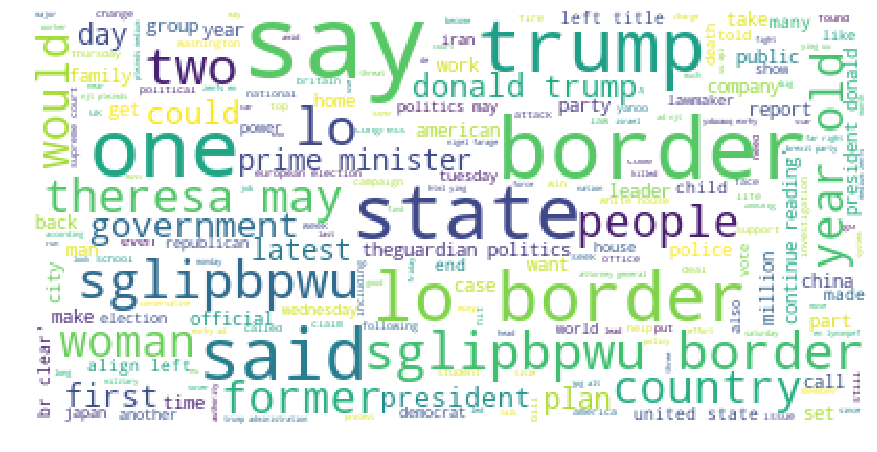

In [23]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=300,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Rake on cleared text

In [29]:
r2 = Rake(language='english')

In [24]:
tekst = ' '.join(corpus[0:100])

In [25]:
r2.extract_keywords_from_text(tekst)

In [26]:
r2.get_ranked_phrases_with_scores()

[(643450.0297571988,
  'glass british irish conference brexit right deal signed agreement guarantee free movement across irish border access study health care scottish government scrap air tax cut plan cut tax paid passenger flying scottish airport scrapped backlash environmental impact euro election pollwatch party faring brexit party lead poll euro election tory course historic low mp expense legacy scandal ten year revelation public outrage opportunity reform parliament missed european election need know vote election register take part really simple guide european election voter across eu go poll find involved stake local election thing may missed beyond headline misery uk two major party smaller plot twist played party party guide european election uk election european parliament fast approaching party shaping wind power energising seaside town multi billion offshore wind project hint brighter future economy great yarmouth wale embraced welsh assembly year twenty year devolution p

In [27]:
r2.get_word_frequency_distribution()

Counter({'labour': 12,
         'pledge': 1,
         'minimum': 3,
         'wage': 2,
         'jeremy': 5,
         'corbyn': 6,
         'unveils': 2,
         'plan': 5,
         'paid': 3,
         'hour': 3,
         'rather': 2,
         'current': 2,
         'brexit': 25,
         'gavin': 5,
         'williamson': 5,
         'attack': 1,
         'theresa': 8,
         'may': 14,
         'talk': 3,
         'recently': 1,
         'sacked': 3,
         'defence': 6,
         'secretary': 10,
         'say': 25,
         'negotiation': 1,
         'deal': 5,
         'fail': 3,
         'could': 1,
         'set': 2,
         'exit': 1,
         'date': 2,
         'week': 3,
         'sir': 4,
         'graham': 2,
         'brady': 2,
         'senior': 3,
         'tory': 6,
         'expects': 1,
         'learn': 1,
         'departure': 2,
         'timetable': 1,
         'within': 1,
         'day': 3,
         'sajid': 1,
         'javid': 2,
         'get': 2,
   

In [28]:
r2.get_word_degrees()

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'labour': 7994,
             'pledge': 557,
             'minimum': 1933,
             'wage': 1376,
             'jeremy': 3571,
             'corbyn': 4128,
             'unveils': 1376,
             'plan': 3571,
             'paid': 2195,
             'hour': 2195,
             'rather': 1376,
             'current': 1376,
             'brexit': 17593,
             'gavin': 3833,
             'williamson': 3833,
             'attack': 557,
             'theresa': 4980,
             'may': 9108,
             'talk': 1671,
             'recently': 557,
             'sacked': 2195,
             'defence': 4390,
             'secretary': 6618,
             'say': 15759,
             'negotiation': 557,
             'deal': 3309,
             'fail': 1671,
             'could': 557,
             'set': 1114,
             'exit': 557,
             'date': 1114,
             'week':